# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [92]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
import alpaca_trade_api as tradeapi

from dotenv import load_dotenv
from alpaca_trade_api.rest import TimeFrame
from MCForecastTools import MCSimulation
from datetime import date
from datetime import timedelta
from numpy import timedelta64

%matplotlib inline

In [45]:
# Load the environment variables from the .env file
# by calling the load_dotenv function. The result must be True in the output cell if .env file was rightly loaded.
load_dotenv()

True

In [22]:
# Check the status of env settings. Type of str in the output cell means python code can access the key-value right.
api_key = os.getenv("NASDAQ_API_KEY")
type(api_key)

str

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [36]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

print(f"The current numbers of BTC and ETH crypto assets in the portfolio are {btc_coins} and {eth_coins} respectively.")

The current numbers of BTC and ETH crypto assets in the portfolio are 1.2 and 5.3 respectively.


#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [8]:
# The monthly amount for the member's household income
monthly_income = 12000

print(f"Monthly amount for the member's household income is {monthly_income}")

Monthly amount for the member's household income is 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [24]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [25]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=True, sort_keys=True))


{
 "data": {
  "1": {
   "circulating_supply": 19173200,
   "id": 1,
   "last_updated": 1665242002,
   "max_supply": 21000000,
   "name": "Bitcoin",
   "quotes": {
    "USD": {
     "market_cap": 373815144545,
     "percent_change_1h": 0.0388955509450091,
     "percent_change_24h": -0.624001520603579,
     "percent_change_7d": 0.0678988626228079,
     "percentage_change_1h": 0.0388955509450091,
     "percentage_change_24h": -0.624001520603579,
     "percentage_change_7d": 0.0678988626228079,
     "price": 19490.15,
     "volume_24h": 16202267954
    }
   },
   "rank": 1,
   "symbol": "BTC",
   "total_supply": 19173200,
   "website_slug": "bitcoin"
  }
 },
 "metadata": {
  "error": null,
  "num_cryptocurrencies": 3116,
  "timestamp": 1665242002
 }
}


In [26]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=True, sort_keys=True))


{
 "data": {
  "1027": {
   "circulating_supply": 120866569,
   "id": 1027,
   "last_updated": 1665241993,
   "max_supply": 120865605,
   "name": "Ethereum",
   "quotes": {
    "USD": {
     "market_cap": 160118478731,
     "percent_change_1h": -0.084104081958019,
     "percent_change_24h": -1.05212742676412,
     "percent_change_7d": -0.373935889024373,
     "percentage_change_1h": -0.084104081958019,
     "percentage_change_24h": -1.05212742676412,
     "percentage_change_7d": -0.373935889024373,
     "price": 1324.18,
     "volume_24h": 5865511548
    }
   },
   "rank": 2,
   "symbol": "ETH",
   "total_supply": 120866569,
   "website_slug": "ethereum"
  }
 },
 "metadata": {
  "error": null,
  "num_cryptocurrencies": 3116,
  "timestamp": 1665241993
 }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [34]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f"The current BTC price is: {btc_price}")


The current BTC price is: 19490.15


In [35]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The current ETH price is: {eth_price}")


The current ETH price is: 1324.18


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [37]:
# Compute the current value of the BTC holding
# Total BTC holding is a product of total BTC assets and BTC unit price
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"Compute the current value of the BTC holding: {btc_value}")


Compute the current value of the BTC holding: 23388.18


In [38]:
# Compute the current value of the ETH holding
# Total ETH holding is a product of total ETH assets and ETH unit price
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f"Compute the current value of the ETH holding: {eth_value}")

Compute the current value of the ETH holding: 7018.154


In [40]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The total value of the cryptocurrency wallet in the portfolio is: {round(total_crypto_wallet, 2)}")


The total value of the cryptocurrency wallet in the portfolio is: 30406.33


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [41]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

print(f"Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio: {spy_shares} and {agg_shares} respectively.")

Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio: 110 and 200 respectively.


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [46]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each.
# Type str in the output means .env loaded right.
display(type(alpaca_api_key))
display(type(alpaca_secret_key))
# Create the Alpaca tradeapi.REST object
# Set the parameters to the alpaca_api_key, alpaca_secret_key and api_version="v2" 
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
    )

print("The Alpaca tradeapi.REST object initialized.")

str

str

The Alpaca tradeapi.REST object initialized.


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [95]:
# Set the tickers for both the bond and stock portion of the portfolio
# iShares Core US Aggregate Bond ETF: 'AGG'
# SPDR S&P 500 ETF Trust: 'SPY'
tickers = ['AGG', 'SPY']

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07

# We will set the closing price for the most-recent trading day
present_day = date.today()
yesterday = present_day - timedelta(days = 1)   # change as needed for wkends

# Format current date as ISO format
start_date = pd.Timestamp(yesterday, tz = 'America/New_York').isoformat()
end_date = pd.Timestamp(yesterday, tz = 'America/New_York').isoformat()
print(f'Today is: {present_day}')
print(f'Yesterday was: {yesterday}')


Today is: 2022-10-08
Yesterday was: 2022-10-07


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [74]:
# Use the Alpaca get_bars function to get current closing prices in the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

display(portfolio_df)

agg_spy_closed_at = portfolio_df.iloc[:,[3, 7]]


print("AGG and SPY closed at:")
display(agg_spy_closed_at)

# Reorganize the DataFrame
# Separate ticker data
AGG = portfolio_df[portfolio_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = portfolio_df[portfolio_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
portfolio_df = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Review the first 5 rows of the Alpaca DataFrame
portfolio_df.head()


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-10-07 04:00:00+00:00,95.81,96.0100,95.68,95.77,6149309,18717,95.836813,AGG
2022-10-07 04:00:00+00:00,369.06,373.2933,360.94,362.79,107239188,665841,365.065822,SPY


AGG and SPY closed at:


,close,symbol
timestamp,,
2022-10-07 04:00:00+00:00,95.77,AGG
2022-10-07 04:00:00+00:00,362.79,SPY


AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2022-10-07 04:00:00+00:00  95.81  96.01  95.68  95.77  6149309       18717   

                                         SPY                            \
                                vwap    open      high     low   close   
timestamp                                                                
2022-10-07 04:00:00+00:00  95.836813  369.06  373.2933  360.94  362.79   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2022-10-07 04:00:00+00:00  107239188      665841  365.065822

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [65]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(portfolio_df['AGG']['close'])

# Print the AGG closing price
print(f"AGG closing price is: {agg_close_price}")


AGG closing price is: 95.77


In [75]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(portfolio_df['SPY']['close'])

# Print the SPY closing price
print(f"SPY closing price is: {spy_close_price}")


SPY closing price is: 362.79


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [67]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"The current value of the AGG bond in the portfolio is : {agg_value}")


The current value of the AGG bond in the portfolio is : 19154.0


In [76]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f"The current value of the SPY stock in the portfolio is : {spy_value}")


The current value of the SPY stock in the portfolio is : 39906.9


In [77]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The total value of the stock and bond portion of the portfolio is: {total_stocks_bonds}")


The total value of the stock and bond portion of the portfolio is: 59060.9


In [79]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f"The current cryptocurrency wallet balance is: ${round(total_crypto_wallet, 2)}")

# Print total value of the member's entire savings portfolio
print(f"The total value of the member's entire savings portfolio is: ${round(total_portfolio, 2)}")


The current cryptocurrency wallet balance is: $30406.33
The total value of the member's entire savings portfolio is: $89467.23


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [80]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
display(savings_data)
    

[30406.334000000003, 59060.9]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [81]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data,
    columns=['amount'],
    index=['crypto', 'stock/bond']
)

# Display the savings_df DataFrame
display(savings_df)

,amount
crypto,30406.334
stock/bond,59060.900


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition By: 2022-10-07'}, ylabel='amount'>

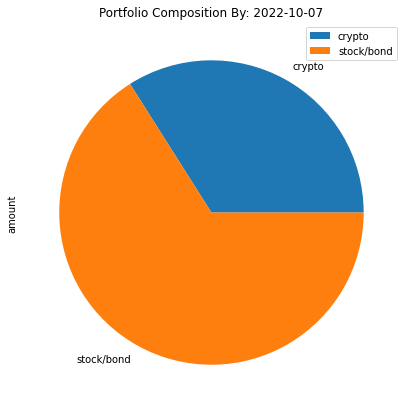

In [82]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title= f'Portfolio Composition By: {yesterday}', figsize=(10,7))

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [83]:
# Create a variable named emergency_fund_value
print(f"Monthly amount for the member's household income is {monthly_income}")

emergency_fund_value = monthly_income * 3
print(f"Emergency Fund set at: {emergency_fund_value}")

Monthly amount for the member's household income is 12000
Emergency Fund set at: 36000


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [84]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f'Congratulations, our valued credit union member! With ${total_portfolio:.2f} in your acount, you have enough fund to manage during emergency!')
elif total_portfolio == emergency_fund_value:
    print(f'Congratulations, our valued credit union member! With ${total_portfolio:.2f} so far in your account, you have reached the important financial goal!')
else:
    print(f'Our valued credit union member, you savings are ${emergency_fund_value - total_portfolio} short of the goal to create a healthy emergency fund.')

Congratulations, our valued credit union member! With $89467.23 in your acount, you have enough fund to manage during emergency!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [88]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date
# We will set the end date as current date, whic is today
end_date_3yrs = pd.to_datetime('today')
start_date_3yrs = end_date_3yrs - timedelta64(3, 'Y')

# Format current date as ISO format
start_3yrs = pd.Timestamp(start_date_3yrs, tz = 'America/New_York').isoformat()
end_3yrs = pd.Timestamp(end_date_3yrs, tz = 'America/New_York').isoformat()

print(f'Begin date is: {start_3yrs}')
print(f'Current date is: {end_3yrs}')

Begin date is: 2019-10-08T21:47:19.839159-04:00
Current date is: 2022-10-08T15:14:55.839159-04:00


In [97]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame

print(f"Tickers are: {tickers}. Timeframe is: {TimeFrame.Day}.")

api_call_3yrs_df = alpaca.get_bars(
    tickers,
    TimeFrame.Day,
    start = start_3yrs,
    end = end_3yrs,
    limit = 10000
).df

# Review the first 5 rows of the Alpaca DataFrame
display(api_call_3yrs_df.head())
print('\n')
# Review the last 5 rows of the Alpaca DataFrame
display(api_call_3yrs_df.tail())

# Reorganize the DataFrame
# Separate ticker data
AGG = api_call_3yrs_df[api_call_3yrs_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = api_call_3yrs_df[api_call_3yrs_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_3yr_df = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Display both the first and last five rows of the DataFrame
display(prices_3yr_df.head())
print('\n')
display(prices_3yr_df.tail())


Tickers are: ['AGG', 'SPY']. Timeframe is: 1Day.


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-10-09 04:00:00+00:00,113.55,113.5600,113.359,113.49,3333988,11224,113.459773,AGG
2019-10-10 04:00:00+00:00,113.27,113.3300,113.030,113.10,4312383,15063,113.115828,AGG
2019-10-11 04:00:00+00:00,112.84,112.8501,112.585,112.73,3568711,16380,112.714593,AGG
2019-10-14 04:00:00+00:00,112.93,112.9300,112.820,112.92,1716740,7655,112.887012,AGG
2019-10-15 04:00:00+00:00,112.90,112.9200,112.550,112.55,4168633,12909,112.627821,AGG


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-10-03 04:00:00+00:00,361.12,368.5500,359.2100,366.61,89052594,617784,364.702960,SPY
2022-10-04 04:00:00+00:00,372.45,378.0000,366.5677,377.97,102736573,683092,375.718180,SPY
2022-10-05 04:00:00+00:00,373.32,379.4600,370.9500,377.09,87641027,581349,375.456940,SPY
2022-10-06 04:00:00+00:00,375.65,378.7200,372.6800,373.20,81289636,577715,374.901554,SPY
2022-10-07 04:00:00+00:00,369.06,373.2933,360.9400,362.79,107239188,665841,365.065822,SPY


AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-10-09 04:00:00+00:00  113.55  113.5600  113.359  113.49  3333988   
2019-10-10 04:00:00+00:00  113.27  113.3300  113.030  113.10  4312383   
2019-10-11 04:00:00+00:00  112.84  112.8501  112.585  112.73  3568711   
2019-10-14 04:00:00+00:00  112.93  112.9300  112.820  112.92  1716740   
2019-10-15 04:00:00+00:00  112.90  112.9200  112.550  112.55  4168633   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2019-10-09 04:00:00+00:00       11224  113.459773  290.78  292.30  288.6559   
2019-10-10 04:00:00+00:00       15063  113.115828  291.14  294.21  291.0000   
2019-10-11 04:00:00+00:00       16380  112.714593  296.28  298.74  296.1448   
2019-10-14 04:00:00+00:00        7655  112.887012  295.93  296.67  295.5700   
2019-10-15 04:00:00+00:00       12909  112.627821  297.05  299.70  296.9700   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2019-10-09 04:00:00+00:00  291.27   67331098      295521  291.047068  
2019-10-10 04:00:00+00:00  293.24   57265975      335440  292.960881  
2019-10-11 04:00:00+00:00  296.28  101330616      503760  297.177407  
2019-10-14 04:00:00+00:00  295.95   40992668      191854  296.136447  
2019-10-15 04:00:00+00:00  298.88   48259856      262203  298.786484

AGG                                              \
                            open   high      low  close   volume trade_count   
timestamp                                                                      
2022-10-03 04:00:00+00:00  96.89  97.48  96.6400  96.91  9400979       35829   
2022-10-04 04:00:00+00:00  97.21  97.55  97.0811  97.17  6787571       27061   
2022-10-05 04:00:00+00:00  96.76  96.99  96.2700  96.66  9505965       27875   
2022-10-06 04:00:00+00:00  96.59  96.71  96.2100  96.28  5621330       17934   
2022-10-07 04:00:00+00:00  95.81  96.01  95.6800  95.77  6149309       18717   

                                         SPY                              \
                                vwap    open      high       low   close   
timestamp                                                                  
2022-10-03 04:00:00+00:00  97.038827  361.12  368.5500  359.2100  366.61   
2022-10-04 04:00:00+00:00  97.280917  372.45  378.0000  366.5677  377.97   
2022-10-05 04:00:00+00:00  96.527323  373.32  379.4600  370.9500  377.09   
2022-10-06 04:00:00+00:00  96.400739  375.65  378.7200  372.6800  373.20   
2022-10-07 04:00:00+00:00  95.836813  369.06  373.2933  360.9400  362.79   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2022-10-03 04:00:00+00:00   89052594      617784  364.702960  
2022-10-04 04:00:00+00:00  102736573      683092  375.718180  
2022-10-05 04:00:00+00:00   87641027      581349  375.456940  
2022-10-06 04:00:00+00:00   81289636      577715  374.901554  
2022-10-07 04:00:00+00:00  107239188      665841  365.065822

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [98]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
prices_3yr_30yr_df = prices_3yr_df

# AGG = .4; SPY = .6
mc_four_six_3yr_30yr_weight = MCSimulation(
    portfolio_data = prices_3yr_30yr_df,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
mc_four_six_3yr_30yr_weight.portfolio_data.head()


AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-10-09 04:00:00+00:00  113.55  113.5600  113.359  113.49  3333988   
2019-10-10 04:00:00+00:00  113.27  113.3300  113.030  113.10  4312383   
2019-10-11 04:00:00+00:00  112.84  112.8501  112.585  112.73  3568711   
2019-10-14 04:00:00+00:00  112.93  112.9300  112.820  112.92  1716740   
2019-10-15 04:00:00+00:00  112.90  112.9200  112.550  112.55  4168633   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-10-09 04:00:00+00:00       11224  113.459773          NaN  290.78   
2019-10-10 04:00:00+00:00       15063  113.115828    -0.003436  291.14   
2019-10-11 04:00:00+00:00       16380  112.714593    -0.003271  296.28   
2019-10-14 04:00:00+00:00        7655  112.887012     0.001685  295.93   
2019-10-15 04:00:00+00:00       12909  112.627821    -0.003277  297.05   

                                                                            \
                             high       low   close     volume trade_count   
timestamp                                                                    
2019-10-09 04:00:00+00:00  292.30  288.6559  291.27   67331098      295521   
2019-10-10 04:00:00+00:00  294.21  291.0000  293.24   57265975      335440   
2019-10-11 04:00:00+00:00  298.74  296.1448  296.28  101330616      503760   
2019-10-14 04:00:00+00:00  296.67  295.5700  295.95   40992668      191854   
2019-10-15 04:00:00+00:00  299.70  296.9700  298.88   48259856      262203   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-10-09 04:00:00+00:00  291.047068          NaN  
2019-10-10 04:00:00+00:00  292.960881     0.006763  
2019-10-11 04:00:00+00:00  297.177407     0.010367  
2019-10-14 04:00:00+00:00  296.136447    -0.001114  
2019-10-15 04:00:00+00:00  298.786484     0.009900

In [99]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
mc_four_six_3yr_30yr_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


f:\Columbia-GitHub\financial_planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000125,0.997186,0.989339,0.998424,0.989227,1.015304,1.003453,0.995292,1.003417,0.987207,...,0.987437,0.996260,0.985296,1.008798,0.989094,1.000325,1.021760,1.004473,0.987831,0.997210
2,1.003840,0.995495,0.986690,1.005487,0.996993,1.029358,1.012963,0.983414,1.010410,0.986485,...,0.996236,0.997028,0.962645,1.000507,0.991868,1.012409,1.020964,0.993473,0.981568,0.999339
3,1.005479,1.001080,0.984240,1.021099,0.992625,1.027399,1.018681,0.982314,1.029873,0.978105,...,0.998820,0.983040,0.946117,0.991046,0.990730,0.998690,1.007658,1.002492,0.971521,0.998776
4,1.000114,1.000582,0.978328,1.024348,0.996123,1.044981,1.041410,0.988333,1.044837,0.978316,...,0.990435,0.986778,0.954901,0.984781,0.987949,0.997667,0.997770,0.999560,0.971442,0.997161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.196328,1.090096,5.267389,0.757163,1.518508,7.717246,0.725417,4.304561,1.325777,1.258874,...,2.530250,3.848471,2.326090,0.851245,7.435581,2.790068,1.434753,1.356578,6.906505,3.128343
7557,1.201507,1.090053,5.294236,0.748702,1.501023,7.726313,0.737479,4.319631,1.311372,1.251446,...,2.513379,3.849037,2.363172,0.848094,7.518878,2.750868,1.430442,1.374317,6.952278,3.141848
7558,1.194886,1.107241,5.277523,0.759847,1.502664,7.641067,0.729783,4.359829,1.300604,1.251532,...,2.466120,3.853705,2.376573,0.858471,7.487368,2.719393,1.425452,1.362028,7.039424,3.153250
7559,1.177848,1.119581,5.292327,0.761708,1.502499,7.722377,0.721507,4.395158,1.293330,1.249189,...,2.480433,3.851886,2.380996,0.862451,7.430880,2.726851,1.428425,1.356333,7.023378,3.143233


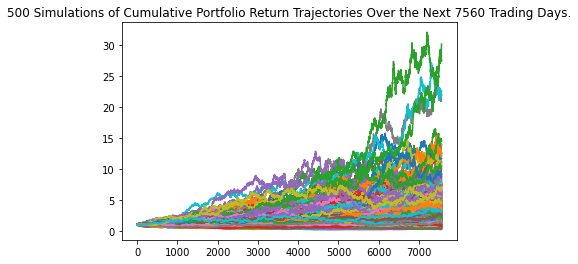

In [101]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
four_six_3yr_30yr_weight_line_plot = mc_four_six_3yr_30yr_weight.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

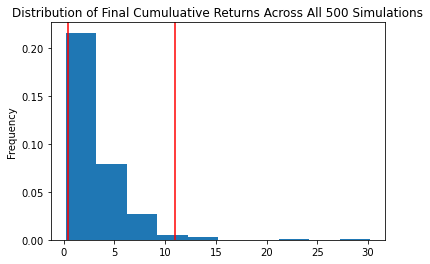

In [102]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
four_six_3yr_30yr_weight_distribution_plot = mc_four_six_3yr_30yr_weight.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [103]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
four_six_3yr_30yr_weight = mc_four_six_3yr_30yr_weight.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
display(four_six_3yr_30yr_weight)

count           500.000000
mean              3.236361
std               3.169562
min               0.223483
25%               1.342938
50%               2.304649
75%               4.204439
max              30.212169
95% CI Lower      0.471771
95% CI Upper     10.983868
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [109]:
# Print the current balance of the stock and bond portion of the members portfolio

ci_lower = four_six_3yr_30yr_weight[8]
ci_upper = four_six_3yr_30yr_weight[9]

CI_upper = four_six_3yr_30yr_weight[9]
print(f"With 95% confidence interval, ci-lower is {ci_lower} and ci-upper is {ci_upper}")

print(f"The current balance of the stock and bond portion of the members portfolio is {round(total_stocks_bonds, 2)}")

With 95% confidence interval, ci-lower is 0.4717707881750832 and ci-upper is 10.983868269205754
The current balance of the stock and bond portion of the members portfolio is 59060.9


In [111]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(ci_lower * total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(ci_upper * total_stocks_bonds,2)

# Print the result of your calculations
print(f"There is a 95% chance that the members portfolio of value ${round(total_stocks_bonds, 2)}"
      f" with a 40%-60% weight portfolio over the next 30 years will end in the range of (low to high)"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")

There is a 95% chance that the members portfolio of value $59060.9 with a 40%-60% weight portfolio over the next 30 years will end in the range of (low to high) $27863.21 and $648717.15.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [114]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
prices_3yr_10yr_df = prices_3yr_df

# weights: split 20% to AGG and 80% to SPY
mc_two_eight_3yr_10yr_weight = MCSimulation(
    portfolio_data = prices_3yr_10yr_df,
    weights = [.2, .8],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
mc_two_eight_3yr_10yr_weight.portfolio_data.head()


AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-10-09 04:00:00+00:00  113.55  113.5600  113.359  113.49  3333988   
2019-10-10 04:00:00+00:00  113.27  113.3300  113.030  113.10  4312383   
2019-10-11 04:00:00+00:00  112.84  112.8501  112.585  112.73  3568711   
2019-10-14 04:00:00+00:00  112.93  112.9300  112.820  112.92  1716740   
2019-10-15 04:00:00+00:00  112.90  112.9200  112.550  112.55  4168633   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-10-09 04:00:00+00:00       11224  113.459773          NaN  290.78   
2019-10-10 04:00:00+00:00       15063  113.115828    -0.003436  291.14   
2019-10-11 04:00:00+00:00       16380  112.714593    -0.003271  296.28   
2019-10-14 04:00:00+00:00        7655  112.887012     0.001685  295.93   
2019-10-15 04:00:00+00:00       12909  112.627821    -0.003277  297.05   

                                                                            \
                             high       low   close     volume trade_count   
timestamp                                                                    
2019-10-09 04:00:00+00:00  292.30  288.6559  291.27   67331098      295521   
2019-10-10 04:00:00+00:00  294.21  291.0000  293.24   57265975      335440   
2019-10-11 04:00:00+00:00  298.74  296.1448  296.28  101330616      503760   
2019-10-14 04:00:00+00:00  296.67  295.5700  295.95   40992668      191854   
2019-10-15 04:00:00+00:00  299.70  296.9700  298.88   48259856      262203   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-10-09 04:00:00+00:00  291.047068          NaN  
2019-10-10 04:00:00+00:00  292.960881     0.006763  
2019-10-11 04:00:00+00:00  297.177407     0.010367  
2019-10-14 04:00:00+00:00  296.136447    -0.001114  
2019-10-15 04:00:00+00:00  298.786484     0.009900

In [115]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
mc_two_eight_3yr_10yr_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


f:\Columbia-GitHub\financial_planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013045,1.008418,0.985070,1.001897,0.999603,0.993403,1.000551,0.989120,1.004479,1.005024,...,1.006187,0.986163,1.006576,0.982643,1.002779,0.978256,0.982643,1.011228,0.987390,0.999809
2,0.994041,1.009598,0.999758,1.006524,1.002785,0.983217,1.004605,0.991910,1.003858,0.992417,...,1.024898,0.999337,1.012102,1.011874,0.987684,0.982413,0.966959,1.019323,1.006487,0.999919
3,1.000022,1.001084,1.022565,1.024788,0.993313,0.965214,1.002359,1.025130,1.015265,1.001375,...,1.030362,0.988271,1.026088,1.022146,0.999951,0.975346,0.977343,1.013497,1.007810,1.000676
4,0.982930,0.990417,1.039813,1.030194,0.991957,0.942542,0.993426,1.020028,1.011305,1.005241,...,1.019577,0.978967,1.026881,1.002631,0.994668,0.958126,0.982969,1.016679,1.022226,1.015440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.321091,0.687071,3.152325,1.260757,2.211498,1.152885,3.010923,4.123045,1.148454,2.200619,...,4.781656,2.183457,2.606827,0.686462,0.948029,1.576305,3.227809,1.470965,0.365813,4.227762
2517,3.319639,0.688040,3.201868,1.276692,2.209540,1.163814,3.001364,4.108599,1.150354,2.159591,...,4.707781,2.145875,2.637879,0.689555,0.947635,1.589030,3.306348,1.475106,0.366745,4.301774
2518,3.319893,0.693548,3.129800,1.301092,2.226186,1.187424,2.988914,4.104156,1.148595,2.152434,...,4.672855,2.103662,2.619724,0.698367,0.948019,1.570232,3.310124,1.465694,0.369585,4.249220
2519,3.299300,0.691619,3.106047,1.304414,2.254526,1.210730,2.973784,4.061847,1.139689,2.104998,...,4.671608,2.115716,2.643345,0.691603,0.938842,1.536599,3.336508,1.473252,0.366600,4.275708


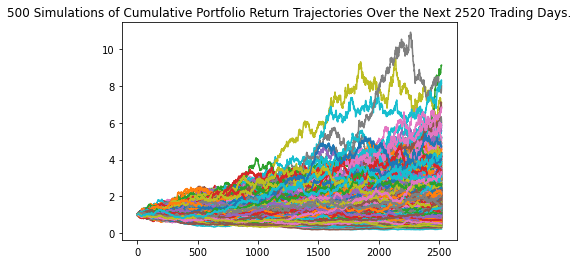

In [116]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
two_eight_3yr_10yr_weight_line_plot = mc_two_eight_3yr_10yr_weight.plot_simulation()

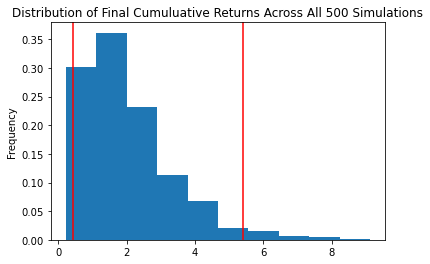

In [117]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
two_eight_3yr_10yr_weight_distribution_plot = mc_two_eight_3yr_10yr_weight.plot_distribution()


In [118]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
two_eight_3yr_10yr_weight = mc_two_eight_3yr_10yr_weight.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print("Review the 10-year Monte Carlo summary statistics")
display(two_eight_3yr_10yr_weight)

Review the 10-year Monte Carlo summary statistics


count           500.000000
mean              2.018939
std               1.328488
min               0.220379
25%               1.057666
50%               1.684956
75%               2.579923
max               9.128924
95% CI Lower      0.432587
95% CI Upper      5.418342
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = # YOUR CODE HERE
ci_upper_ten_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?